In [311]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns

print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


In [312]:
df1 = pd.read_csv('../input/Admission_Predict.csv', sep='\s*,\s*', header=0, encoding='ascii', engine='python')
df2 = pd.read_csv('../input/Admission_Predict_Ver1.1.csv', sep='\s*,\s*', header=0, encoding='ascii', engine='python')

In [313]:
df = df2
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [314]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [315]:
all_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
target = 'Chance of Admit'


In [316]:
df['CGPA'] = df['CGPA'].apply(lambda x: ((x/10)*4))

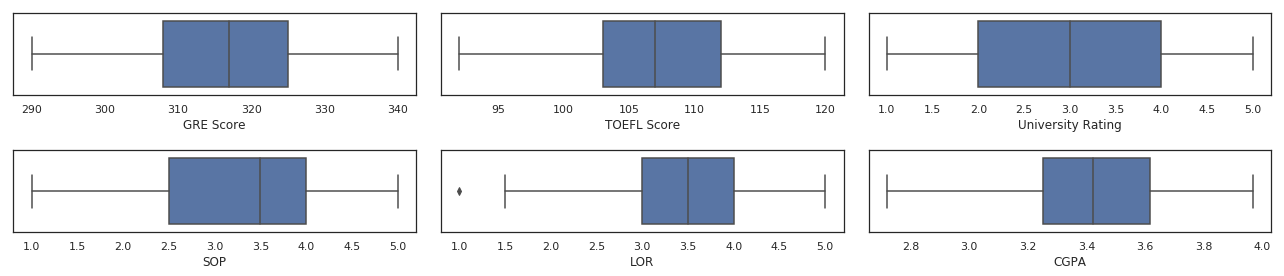

In [317]:
fig = plt.figure(figsize=(18, 4))
fig.subplots_adjust(hspace=1)

for i in range(len(columns)-1):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[columns[i]])
plt.tight_layout()   

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

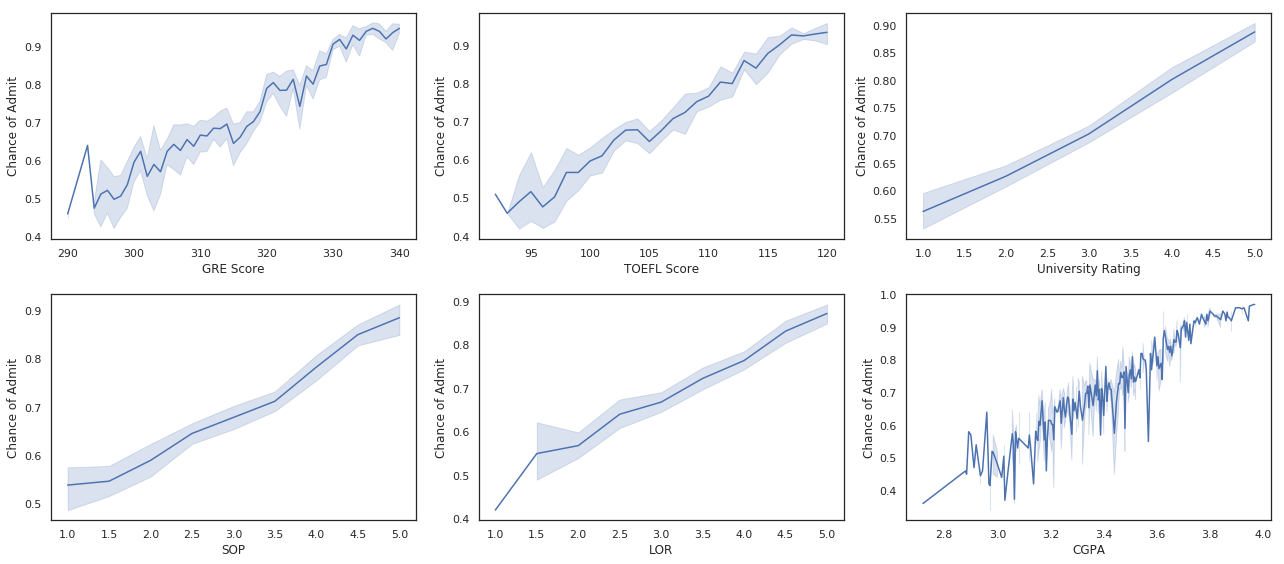

In [318]:
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(hspace=1)

for i in range(len(columns)-1):
    plt.subplot(2, 3, i+1)
    sns.lineplot(x=columns[i], y=target, data=df)
plt.tight_layout()   
plt.plot()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[]

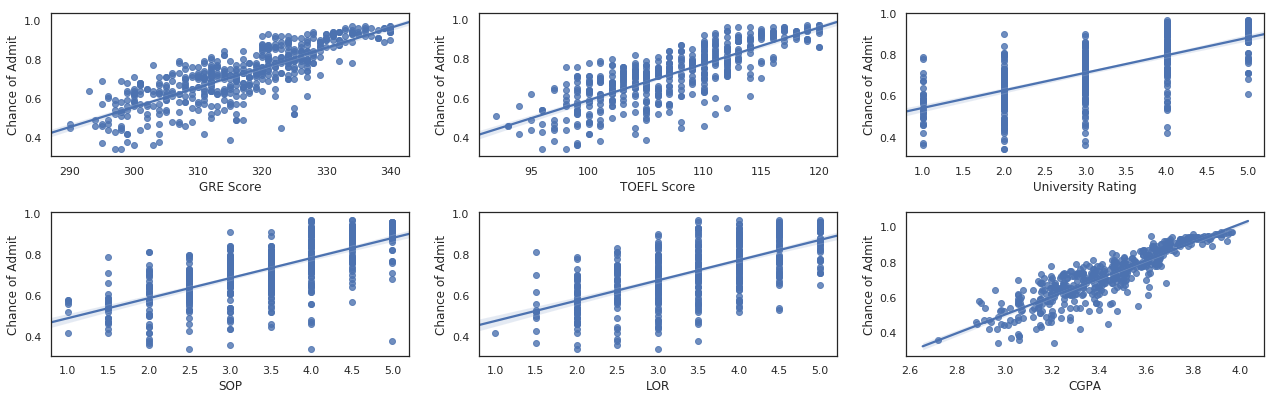

In [319]:
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(hspace=1)

for i in range(len(columns)-1):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=columns[i], y=target, data=df)
plt.tight_layout()   
plt.plot()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


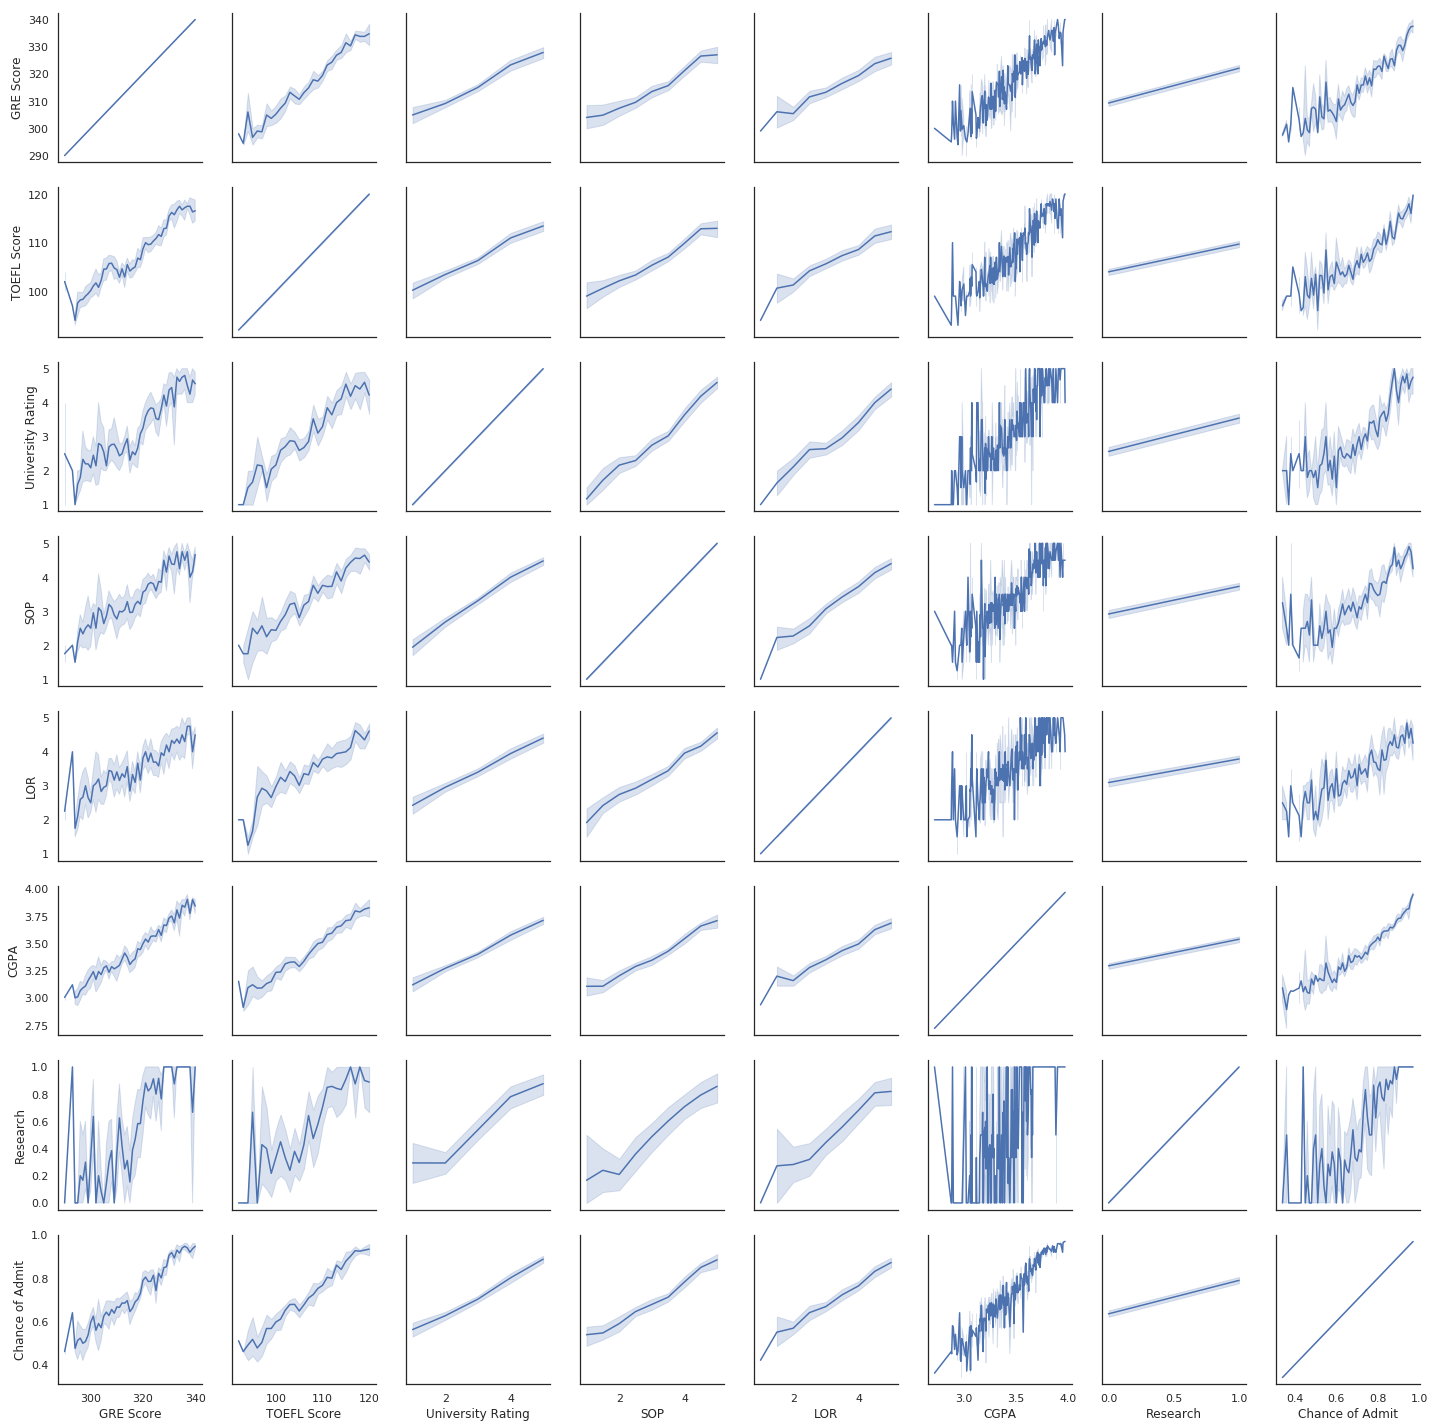

In [320]:
g = sns.PairGrid(df[all_columns])
g.map(sns.lineplot);

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

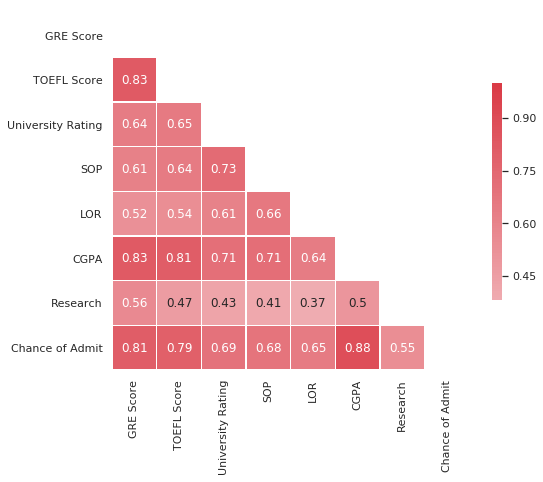

In [321]:
sns.set(style="white")

d = df[all_columns]

corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(len(all_columns), len(all_columns)))

cmap = sns.diverging_palette(h_neg=220, h_pos=10, s=75, l=50, sep=10, n=len(all_columns), center='light', as_cmap=True)

ax = sns.heatmap(
    corr,
    cmap=cmap,
    center=0,
    robust=True,
    annot=True,
    linewidths=0.5,
    linecolor='white',
    cbar=True,
    cbar_kws={"shrink": .5},
    square=True,
    mask=mask)

plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [322]:
def print_performance(model, X_test, y_test):
    preds = model.predict(X_test)

    explained_variance_score = metrics.explained_variance_score(y_test, preds)
    mean_absolute_error = metrics.mean_absolute_error(y_test, preds)
    mean_squared_log_error = metrics.mean_squared_log_error(y_test, preds)
    median_absolute_error = metrics.median_absolute_error(y_test, preds)
    r2_score = metrics.r2_score(y_test, preds)

    print("-"*55)
    print("Performance")
    print("-"*55)
    print("{} : {:.4f}".format("Explained Variance Score ", explained_variance_score))
    print("{} : {:.4f} ".format("Mean Absolute Error      ", mean_absolute_error))
    print("{} : {:.4f} ".format("Mean Squared Error       ", mean_squared_log_error))
    print("{} : {:.4f} ".format("Median Squared Error     ", median_absolute_error))
    print("{} : {:.4f} ".format("R2 Score                 ", r2_score))
    print("-"*55)
    print("\n\n")
    
    return preds

In [323]:
X = df[columns].values
y = df[target].values

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Linear Regression")
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

print("Model Score", model.score(X_test, y_test))

preds = print_performance(model, X_test, y_test)

Linear Regression
Model Score 0.816321301606212
-------------------------------------------------------
Performance
-------------------------------------------------------
Explained Variance Score  : 0.8167
Mean Absolute Error       : 0.0431 
Mean Squared Error        : 0.0013 
Median Squared Error      : 0.0313 
R2 Score                  : 0.8163 
-------------------------------------------------------





In [383]:
GRE_Score = 313
TOEFL_Score = 102
University_Rating = 5
SOP = 3
LOR = 3
CGPA = 3.80
Research = 1

sample1 = [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research]
sample1 = np.array(sample1).reshape(1, -1)

sample1 = scaler.transform(sample1)

probab = model.predict(sample1)
print("Chance of admission: {:.2f}%".format(probab[0]*100))

Chance of admission: 81.19%


In [ ]:
# ! pip install ipywidgets
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual


while(True):
    print("\n\nPlease Enter -1 to Exit or Enter to Continue: ")
    b = input()
    if b=='-1':
        print("Exiting Admission Calcultor")
        break
    print("\nPlease Enter GRE Score: ")
    GRE_Score = float(input())
    print("\nPlease Enter TOEFL Score: ")
    TOEFL_Score = float(input()) 
    print("\nPlease Enter University Rating:")
    University_Rating = float(input())  
    print("\nPlease Enter SOP: ")
    SOP = float(input()) 
    print("\nPlease Enter LOR: ")
    LOR = float(input())  
    print("\nPlease Enter CGPA: ")
    CGPA = float(input())  
    print("\nPlease Enter Research: ")
    Research = float(input())  

    sample2 = [GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA, Research]
    print(sample2)
    sample2 = np.array(sample1).reshape(1, -1)

#     sample2 = scaler.transform(sample2)

    probab2 = model.predict(sample2)
    print("Chance of admission: {:.2f}%".format(probab2[0]*100))
    



Please Enter -1 to Exit or Enter to Continue: 
